In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando conjunto de dados
iris = sns.load_dataset('iris')

In [3]:
# Estilo dos gráficos
plt.style.use('ggplot')

In [4]:
#Funções e variávei auxiliares 
# Função para particionar dataset por espécie
def getDataBySpecies(speciesList):
  dataBySpecies = []
  for sp in speciesList:
    dataBySpecies.append(iris[iris['species'] == sp])
  return dataBySpecies

# Função para calcular média dos atributos por espécie
def attributesMeanBySpecies(speciesData):
  attributesValuesList = []
  for attribute in iris.columns.to_list():
    if attribute != 'species':
      attributesValuesList.append(speciesData[attribute].mean())
  return attributesValuesList

# Espécies do conjunto de dados
speciesNames = iris.species.unique()

# Atributos investigados
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Conjunto de dados por espécie
setosa,versicolor,virginica = getDataBySpecies(iris.species.unique())


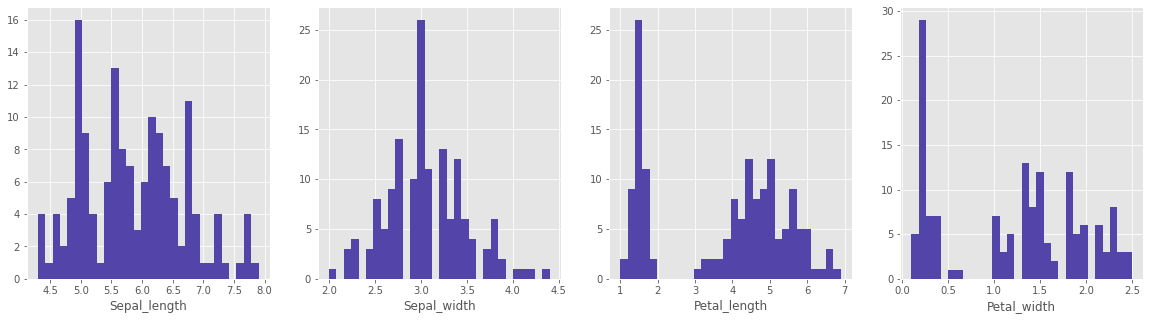

In [5]:
# Distribuição da frequência dos attributos
n_bins = 30
i=0

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for attribute in attributes:
  axs[i].hist(iris[attribute], bins=n_bins, color='#5344A9')
  axs[i].set(xlabel=attribute.capitalize())
  i=i+1


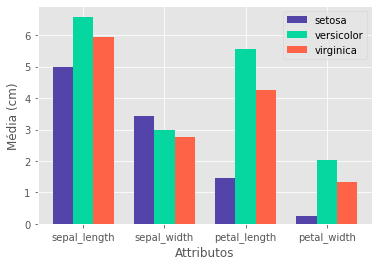

In [6]:
# Média dos atributos por espécie
xCoordinates = np.arange((len(iris.columns.to_list())-1))
plt.bar(xCoordinates, attributesMeanBySpecies(setosa), label=speciesNames[0], color='#5344A9', width=0.25)
plt.bar([x+0.25 for x in xCoordinates], attributesMeanBySpecies(virginica), label=speciesNames[1], color='#06d6a0', width=0.25)
plt.bar([x+0.50 for x in xCoordinates], attributesMeanBySpecies(versicolor), label=speciesNames[2], color='tomato', width=0.25)
plt.xticks([x + 0.25 for x in xCoordinates],labels=attributes)
plt.xlabel("Attributos")
plt.ylabel("Média (cm)")
plt.legend()

(2.0, 5.0, 0.0, 3.0)

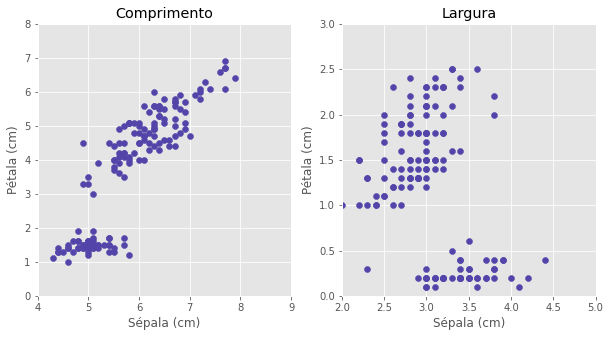

In [7]:
# Relação entre comprimento da sépala e da pétala e largura da sépala e da pétala (total)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(attributes[0], attributes[2], data=iris, color='#5344A9')
ax1.set(title='Comprimento', xlabel='Sépala (cm)', ylabel='Pétala (cm)')
ax1.axis([4,9,0,8])

ax2.scatter(attributes[1], attributes[3], data=iris, color='#5344A9')
ax2.set(title='Largura',  xlabel='Sépala (cm)', ylabel='Pétala (cm)')
ax2.axis([2,5,0,3])


(4.0, 8.2, 0.0, 8.0)

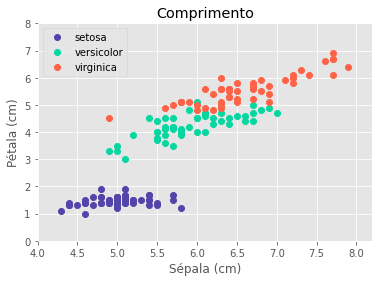

In [15]:
# # Relação entre comprimento da sépala e da pétala por espécie
colors = ['#5344A9', '#06d6a0', 'tomato']
dataBySpecies = getDataBySpecies(speciesNames)

for species,color,sp_name in zip(dataBySpecies,colors,speciesNames):
  plt.plot(species[attributes[0]], species[attributes[2]], 'o', color=color, label=sp_name)

plt.xlabel('Sépala (cm)')
plt.ylabel('Pétala (cm)')
plt.title('Comprimento')
plt.legend()
plt.axis([4,8.2,0,8])

(1.8, 4.7, -0.3, 3.0)

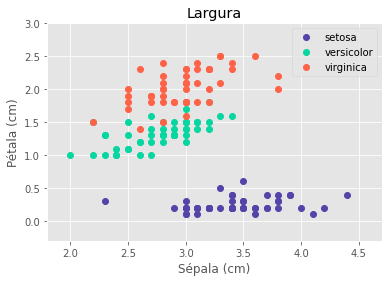

In [30]:
# # Relação entre largura da sépala e da pétala por espécie
colors = ['#5344A9', '#06d6a0', 'tomato']
dataBySpecies = getDataBySpecies(speciesNames)

for species,color,sp_name in zip(dataBySpecies,colors,speciesNames):
  plt.plot(species[attributes[1]], species[attributes[3]], 'o', color=color, label=sp_name)

plt.xlabel('Sépala (cm)')
plt.ylabel('Pétala (cm)')
plt.title('Largura')
plt.legend()
plt.axis([1.8,4.7,-0.3,3])

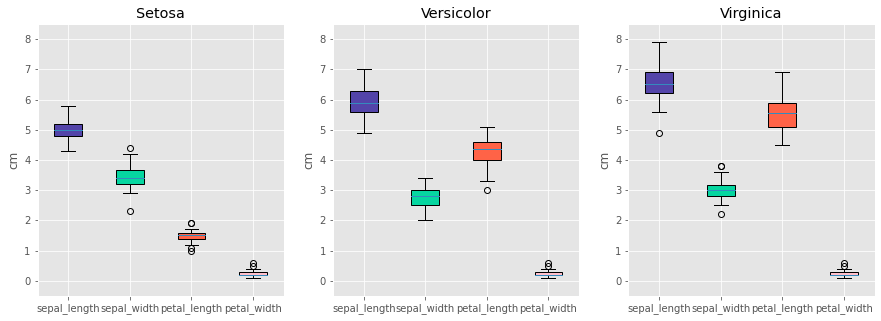

In [11]:
# Variação dos atributos por espécie
fig, (axs) = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#5344A9', '#06d6a0', 'tomato', 'pink']
bplotList = []
i=0

for species in dataBySpecies:
 bplotList.append(axs[i].boxplot(
                      [species[attributes[0]], species[attributes[1]], species[attributes[2]], setosa[attributes[3]]], 
                      vert=True, 
                      patch_artist=True,
                      labels=attributes))
 axs[i].set(title=speciesNames[i].capitalize(), ylabel='cm')
 axs[i].axis([0.5,4.5,-0.5,8.5])
 i=i+1

for bplot in bplotList:
  for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)